# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [5]:
n = 500

gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [8]:
income_data[1:10]

['Rich',
 'Poor',
 'Rich',
 'Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Rich',
 'Rich']

In [9]:
#z-> N (0,1)
#N(m,n) -> m + n * z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [10]:
data = pd.DataFrame(
{
    "Gender" : gender_data,
    "Economic Status": income_data,
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Income": income
})

In [11]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,192.431479,51.424374,11.670460,22010.217800
1,Male,Rich,178.051261,52.855855,46.649124,12594.968932
2,Male,Poor,117.088606,73.079919,14.318675,18721.077773
3,Female,Rich,96.581390,83.299272,32.886794,18461.820589
4,Female,Poor,102.358237,27.958002,65.102520,20246.224566


## Agrupación de datos

In [13]:
grouped_gender = data.groupby("Gender")

In [14]:
grouped_gender.groups

{'Female': Int64Index([  0,   3,   4,   5,   6,   8,   9,  11,  12,  13,
             ...
             477, 479, 482, 484, 487, 488, 491, 494, 495, 496],
            dtype='int64', length=237),
 'Male': Int64Index([  1,   2,   7,  10,  14,  16,  17,  18,  22,  23,
             ...
             483, 485, 486, 489, 490, 492, 493, 497, 498, 499],
            dtype='int64', length=263)}

In [15]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female    Middle Class  192.431479   51.424374  11.670460  22010.217800
3    Female            Rich   96.581390   83.299272  32.886794  18461.820589
4    Female            Poor  102.358237   27.958002  65.102520  20246.224566
5    Female    Middle Class  123.045148   61.573869  16.813907  20484.353240
6    Female            Rich  141.619069  101.906104  20.580654  17930.838352
..      ...             ...         ...         ...        ...           ...
488  Female            Poor  179.814770   76.868415   4.376439  18236.458771
491  Female    Middle Class  146.047391   54.396440  29.873640  20596.975119
494  Female            Rich  182.047807   81.585462  38.337335  21638.389396
495  Female            Poor  200.976933   46.728306  -0.562563  22015.878031
496  Female            Poor  227.965737   80.779457  34.300941  20764.252161

[237 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [17]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,192.431479,51.424374,11.670460,22010.217800
3,Female,Rich,96.581390,83.299272,32.886794,18461.820589
4,Female,Poor,102.358237,27.958002,65.102520,20246.224566
5,Female,Middle Class,123.045148,61.573869,16.813907,20484.353240
6,Female,Rich,141.619069,101.906104,20.580654,17930.838352
...,...,...,...,...,...,...
488,Female,Poor,179.814770,76.868415,4.376439,18236.458771
491,Female,Middle Class,146.047391,54.396440,29.873640,20596.975119
494,Female,Rich,182.047807,81.585462,38.337335,21638.389396
495,Female,Poor,200.976933,46.728306,-0.562563,22015.878031


In [21]:
double_group = data.groupby(["Gender", "Economic Status"])

In [22]:
len(double_group)

6

In [23]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
0    Female    Middle Class  192.431479   51.424374  11.670460  22010.217800
5    Female    Middle Class  123.045148   61.573869  16.813907  20484.353240
15   Female    Middle Class  169.044552   36.001595  17.854116  13021.516639
19   Female    Middle Class  209.930218   52.671748  53.882177  17524.371770
25   Female    Middle Class  119.077316   76.251110  29.875148  21732.653824
..      ...             ...         ...         ...        ...           ...
459  Female    Middle Class  159.788778   58.427161  52.096314  13178.722486
479  Female    Middle Class  167.750539   90.532577  13.514744  20008.939514
482  Female    Middle Class  123.616019  118.533809  22.374099  12617.110692
487  Female    Middle Class  129.850082   45.851972  22.839875  16473.278541
491  Female    Middle Class  146.047391   54.396440  29.873640  20596.975119

[82 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [26]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.944111  66.271170  29.632536  17893.297548
       Poor             164.689436  64.483493  32.814137  18067.615644
       Rich             161.988440  63.740221  29.915502  18605.239244
Male   Middle Class     155.589696  59.957635  31.461709  17950.873987
       Poor             157.235235  62.187525  31.791374  17997.559176
       Rich             154.512660  64.249628  26.904479  18089.710712

In [27]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               75
        Rich               80
Male    Middle Class       80
        Poor               89
        Rich               94
dtype: int64

In [28]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      82.0  160.944111  30.643171   94.034486  138.582791   
       Poor              75.0  164.689436  30.099459   84.993249  146.366859   
       Rich              80.0  161.988440  31.368497   89.407577  139.113780   
Male   Middle Class      80.0  155.589696  27.956649   90.683159  136.425650   
       Poor              89.0  157.235235  30.166945  105.521529  132.119793   
       Rich              94.0  154.512660  33.774127   81.140159  129.816253   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     162.472766  186.800477  230.992242   82.0  66.271170   
       Poor             167.535996  186.045511  227.965737   75.0  64.483493   
       Rich             164.856741  181.543565  243.743362   80.0  63.740221   
Male   Middle Class     153.477910  173.345423  219.211129   80.0  59.957635   
       Poor             155.836157  184.210270  222.738770   89.0  62.187525   
       Rich             154.385797  177.663316  230.964837   94.0  64.249628   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  37.283543  68.704293   82.0  17893.297548   
       Poor             ...  40.679222  65.102520   75.0  18067.615644   
       Rich             ...  37.578726  57.458620   80.0  18605.239244   
Male   Middle Class     ...  37.676881  59.415327   80.0  17950.873987   
       Poor             ...  40.960388  59.924282   89.0  17997.559176   
       Rich             ...  34.152123  58.485729   94.0  18089.710712   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3507.343270   8126.580290  15477.817381  17980.796527   
       Poor             3739.197465   9645.402230  15341.139207  18413.660231   
       Rich             3203.752689  10932.261033  16482.314202  18733.389826   
Male   Middle Class     3369.412853  10462.408807  15688.861455  18130.950905   
       Poor             3629.183361   9286.267348  15376.368998  18039.152755   
       Rich             3321.639204  10127.173210  15730.872174  18083.951817   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20351.456981  26610.306277  
       Poor             20805.911611  25421.865539  
       Rich             20761.555907  27617.292319  
Male   Middle Class     20731.615964  24652.490637  
       Poor             20556.860031  26101.224193  
       Rich             20704.122616  25862.580724  

[6 rows x 32 columns]

In [29]:
grouped_income = double_group["Income"]

In [30]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      82.0  17893.297548  3507.343270   8126.580290   
       Poor              75.0  18067.615644  3739.197465   9645.402230   
       Rich              80.0  18605.239244  3203.752689  10932.261033   
Male   Middle Class      80.0  17950.873987  3369.412853  10462.408807   
       Poor              89.0  17997.559176  3629.183361   9286.267348   
       Rich              94.0  18089.710712  3321.639204  10127.173210   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15477.817381  17980.796527  20351.456981  26610.306277  
       Poor             15341.139207  18413.660231  20805.911611  25421.865539  
       Rich             16482.314202  18733.389826  20761.555907  27617.292319  
Male   Middle Class     15688.861455  18130.950905  20731.615964  24652.490637  
       Poor             15376.368998  18039.152755  20556.860031  26101.224193  
       Rich             15730.872174  18083.951817  20704.122616  25862.580724

In [31]:
double_group.aggregate(
{
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.467250e+06  29.632536  30.643171
       Poor             1.355071e+06  32.814137  30.099459
       Rich             1.488419e+06  29.915502  31.368497
Male   Middle Class     1.436070e+06  31.461709  27.956649
       Poor             1.601783e+06  31.791374  30.166945
       Rich             1.700433e+06  26.904479  33.774127

In [32]:
double_group.aggregate(
{
    "Age": np.mean,
    "Height": lambda h: np.mean(h)/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     29.632536  5.284523
       Poor             32.814137  5.508354
       Rich             29.915502  5.196630
Male   Middle Class     31.461709  5.600505
       Poor             31.791374  5.241701
       Rich             26.904479  4.599413

In [33]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13197.417093  160.944111  30.643171  5434.235937   
       Poor             12351.707663  164.689436  30.099459  4836.261999   
       Rich             12959.075230  161.988440  31.368497  5099.217668   
Male   Middle Class     12447.175665  155.589696  27.956649  4796.610771   
       Poor             13993.935956  157.235235  30.166945  5534.689740   
       Rich             14524.190015  154.512660  33.774127  6039.464988   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     66.271170  21.539324  2429.867936  29.632536   
       Poor             64.483493  23.225613  2461.060261  32.814137   
       Rich             63.740221  26.974465  2393.240167  29.915502   
Male   Middle Class     59.957635  26.645563  2516.936699  31.461709   
       Poor             62.187525  22.981859  2829.432312  31.791374   
       Rich             64.249628  23.537745  2529.021001  26.904479   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.484463  1.467250e+06  17893.297548  3507.343270  
       Poor             13.000291  1.355071e+06  18067.615644  3739.197465  
       Rich             11.810337  1.488419e+06  18605.239244  3203.752689  
Male   Middle Class     10.523820  1.436070e+06  17950.873987  3369.412853  
       Poor             13.219804  1.601783e+06  17997.559176  3629.183361  
       Rich             12.216667  1.700433e+06  18089.710712  3321.639204

In [36]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.284523  3.095687  2.211055  5.133062
       Poor             5.508354  2.795092  2.541105  4.864489
       Rich             5.196630  2.377892  2.548974  5.843967
Male   Middle Class     5.600505  2.264389  3.008433  5.361210
       Poor             5.241701  2.721271  2.418455  4.987218
       Rich             4.599413  2.744279  2.214085  5.475221

## Filtrado de datos

In [37]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      11.670460
1      46.649124
2      14.318675
4      65.102520
5      16.813907
         ...    
495    -0.562563
496    34.300941
497    35.359673
498    38.636541
499    23.519250
Name: Age, Length: 420, dtype: float64

## Transformación de variables

In [39]:
zscore = lambda x:(x - x.mean()/x.std())

In [41]:
z_group = double_group.transform(zscore)

In [42]:
import matplotlib.pyplot as plt

(array([  3.,   9.,  26.,  87., 117., 122.,  72.,  43.,  19.,   2.]),
 array([-12.44989463,  -4.55422904,   3.34143656,  11.23710216,
         19.13276775,  27.02843335,  34.92409894,  42.81976454,
         50.71543013,  58.61109573,  66.50676133]),
 <a list of 10 Patch objects>)

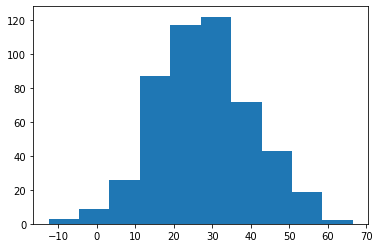

In [43]:
plt.hist(z_group["Age"])

In [44]:
fill_na_mean = lambda x: x.fillna[x.mean()]#Sustituir los espacios en blanco por el promedio

In [46]:
double_group.transform(fill_na_mean)

TypeError: Transform function invalid for data types

## Operaciones diversas muy útiles

In [47]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,192.431479,51.424374,11.670460,22010.217800
1,Male,Rich,178.051261,52.855855,46.649124,12594.968932
2,Male,Poor,117.088606,73.079919,14.318675,18721.077773
3,Female,Rich,96.581390,83.299272,32.886794,18461.820589
4,Female,Poor,102.358237,27.958002,65.102520,20246.224566
17,Male,Middle Class,140.858166,59.571647,22.818153,14291.702701


In [48]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     110.002903  70.047179   9.343196  13067.278655
       Poor             129.284329  88.902912  25.549569  18445.288030
       Rich             174.823576  63.374120  38.441124  19657.957241
Male   Middle Class     167.758574  60.055412  19.334654  18300.133282
       Poor             179.779981  15.162870  37.211815  21771.314102
       Rich             186.722724  59.429457  24.863558  25862.580724

In [49]:
data_sorted = data.sort_values(["Age", "Income"])

In [52]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
110,Female,Middle Class,171.213750,57.152662,-10.252363,18464.008317
174,Male,Rich,125.201794,46.866207,-5.799720,20853.038804
397,Female,Middle Class,174.617451,80.443769,-2.918695,15304.738054
274,Female,Rich,172.728156,82.599339,-0.567184,18768.170566
495,Female,Poor,200.976933,46.728306,-0.562563,22015.878031
416,Female,Middle Class,131.450366,78.710703,-0.358108,26610.306277
158,Male,Rich,156.739934,82.287122,3.060805,14562.820753
387,Male,Rich,169.347006,76.277814,3.105338,14549.384537
480,Male,Rich,167.676114,79.915967,3.555945,14759.701796
488,Female,Poor,179.814770,76.868415,4.376439,18236.458771
